In [18]:
# ch4-2.py
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)

In [19]:
# 데이터로드 (NHIS_OPEN_GJ_2017.csv : 데이터 원본 파일)
# encoding : 윈도우즈 환경에서의 한글 처리
# engine : python 3.6에서 한글이 포함된 파일이름 사용
%time \
rawData_org = pd.read_csv('./NHIS_OPEN_GJ_2017.csv', encoding='CP949', engine='python')

CPU times: user 21 s, sys: 1.46 s, total: 22.5 s
Wall time: 22.5 s


In [20]:
rawData_org.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [21]:
# 원본데이터의 튜플 수와 컬럼수 출력
rawData_org.shape

(1000000, 34)

In [22]:
# 의사결정트리에 사용할 속성리스트
feature_columns_to_use = ['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)','허리둘레',
                          '시력(좌)', '시력(우)','청력(좌)', '청력(우)','수축기혈압',
                          '이완기혈압', '식전혈당(공복혈당)', '트리글리세라이드', 'HDL콜레스테롤','LDL콜레스테롤',
                          '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT','감마지티피',
                          '흡연상태', '음주여부']

In [23]:
len(feature_columns_to_use)

22

In [24]:
rawData = rawData_org[feature_columns_to_use]
rawData.head()

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
0,1,13,170.0,65.0,91.0,1.0,1.2,1.0,1.0,158.0,...,161.0,43.0,102.0,1.0,1.0,19.0,41.0,25.0,3.0,0.0
1,2,8,150.0,45.0,73.4,1.2,1.0,1.0,1.0,110.0,...,82.0,62.0,176.0,1.0,0.9,16.0,13.0,10.0,1.0,0.0
2,1,8,175.0,75.0,94.0,1.0,0.8,1.0,1.0,130.0,...,271.0,64.0,92.0,1.0,1.1,45.0,62.0,136.0,1.0,0.0
3,2,12,155.0,55.0,67.5,0.9,1.0,1.0,1.0,138.0,...,97.0,52.0,88.0,1.0,0.6,21.0,24.0,30.0,1.0,1.0
4,1,8,175.0,75.0,93.0,1.5,1.5,1.0,1.0,128.0,...,182.0,47.0,169.0,1.0,1.1,37.0,62.0,68.0,3.0,0.0


In [25]:
# 속성값이 NULL인 튜플 제외
rawData = rawData.dropna()

In [26]:
# 인덱스 재설정
rawData.reset_index(inplace=True, drop=True)

In [27]:
# 원본데이터의 튜플 수와 컬럼수 출력
rawData.shape

(990910, 22)

In [28]:
import random as rd  # 샘플링을 위한 random 패키지 임포트

# 1) 샘플링을 통한 수량 축소
# 원본데이터 중 50,000개를 튜플만 샘플링
# len() : 데이터프레임의 크기를 구하는 함수
sample_idx = rd.sample(range(0, len(rawData)), 50000)

# 인덱스 값 정렬(오름차순)
sample_idx.sort()

sample_idx[:10]

[15, 27, 37, 40, 51, 57, 72, 81, 106, 118]

In [29]:
# 샘플링 된 인덱스로 구성된 샘플 데이터프레임 생성
rawData_sample = rawData.loc[sample_idx]

rawData_sample.reset_index(inplace=True, drop=True) #  인덱스 재설정

# 첫 10개의 행만 출력
rawData_sample.head(10)

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
0,2,15,150.0,45.0,69.0,0.6,0.8,1.0,1.0,110.0,...,155.0,64.0,119.0,1.0,0.8,19.0,14.0,10.0,1.0,0.0
1,1,8,165.0,55.0,74.0,1.2,1.0,1.0,1.0,142.0,...,92.0,50.0,136.0,1.0,0.9,16.0,14.0,20.0,1.0,0.0
2,2,13,150.0,50.0,73.2,0.9,1.2,1.0,1.0,94.0,...,58.0,78.0,89.0,1.0,0.8,18.0,10.0,15.0,1.0,0.0
3,1,12,160.0,60.0,83.0,0.5,0.8,1.0,1.0,118.0,...,73.0,40.0,126.0,1.0,0.8,15.0,15.0,48.0,3.0,1.0
4,1,10,170.0,70.0,87.0,1.0,1.2,1.0,1.0,128.0,...,173.0,52.0,125.0,2.0,0.9,37.0,51.0,109.0,3.0,1.0
5,2,9,155.0,45.0,66.0,1.5,2.0,1.0,1.0,127.0,...,61.0,79.0,68.0,1.0,0.7,16.0,13.0,14.0,1.0,0.0
6,1,6,180.0,95.0,95.0,1.2,1.0,1.0,1.0,130.0,...,337.0,46.0,105.0,1.0,1.1,35.0,78.0,73.0,3.0,1.0
7,1,14,155.0,45.0,75.0,0.7,0.7,1.0,1.0,118.0,...,125.0,47.0,86.0,1.0,0.7,35.0,25.0,16.0,1.0,0.0
8,2,11,150.0,60.0,87.5,1.5,1.5,1.0,1.0,132.0,...,389.0,43.0,89.0,1.0,0.7,25.0,29.0,18.0,1.0,0.0
9,2,5,160.0,50.0,68.0,1.0,1.0,1.0,1.0,101.0,...,82.0,61.0,167.0,1.0,0.7,13.0,10.0,16.0,3.0,1.0


In [30]:
rawData_sample.shape

(50000, 22)

In [31]:
# nonnumeric 속성을 categrical 데이터로 변환
nonnumeric_columns = ['성별코드','음주여부']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for feature in nonnumeric_columns:
    rawData_sample[feature] = le.fit_transform(rawData_sample[feature]) # 0부터 시작해서 1,2,3 계속 라벨링해줌  

In [32]:
rawData_sample.head() 

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
0,1,15,150.0,45.0,69.0,0.6,0.8,1.0,1.0,110.0,...,155.0,64.0,119.0,1.0,0.8,19.0,14.0,10.0,1.0,0
1,0,8,165.0,55.0,74.0,1.2,1.0,1.0,1.0,142.0,...,92.0,50.0,136.0,1.0,0.9,16.0,14.0,20.0,1.0,0
2,1,13,150.0,50.0,73.2,0.9,1.2,1.0,1.0,94.0,...,58.0,78.0,89.0,1.0,0.8,18.0,10.0,15.0,1.0,0
3,0,12,160.0,60.0,83.0,0.5,0.8,1.0,1.0,118.0,...,73.0,40.0,126.0,1.0,0.8,15.0,15.0,48.0,3.0,1
4,0,10,170.0,70.0,87.0,1.0,1.2,1.0,1.0,128.0,...,173.0,52.0,125.0,2.0,0.9,37.0,51.0,109.0,3.0,1


In [33]:
# 소스 데이터프레임에서 분류(classification)을 위한 속성 집합
X = rawData_sample.loc[:, feature_columns_to_use[:-1]]  
y = rawData_sample.loc[:, '음주여부']  # 분류 클래스(class)

In [34]:
from sklearn.model_selection import train_test_split  # 분석모형 선택에 관련된 모듈
    
# 자동으로 데이터셋을 트레이닝셋과 테스트셋으로 분리해주는 함수로
# 트레이닝셋과 데이터셋의 비율을 7:3으로 세팅함
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
# RMSLE 계산하는 사용자정의 함수
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values) :
    # 넘파이로 배열 형태로 변환
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제값에 1을 더하고 로그를 씌움
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 함
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균값 구함
    mean_difference = difference.mean()
    
    # 다시 루트를 씌움
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [68]:
# Scikit-Learn 패키지 : 머신 러닝 교육 및 실무를 위한 패키지로 샘플 데이터셋,
# 다양한 기계학습 기법에 대한 함수 등을 포함하고 있음
from sklearn.tree import DecisionTreeClassifier  # 의사결정트리 기법에 관련된 모듈

# DecisionTreeClassifier() : 의사결정트리를 생성하는 함수
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
decision_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [69]:
# KFold 교차검증
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

%time\
score = cross_val_score(decision_tree, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()

# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

CPU times: user 3.53 s, sys: 66.7 ms, total: 3.6 s
Wall time: 923 ms
Score= 0.37186


In [70]:
# fit() : 트레이닝 데이터셋을 대상으로 의사결정트리 학습 진행
decision_tree.fit(X_train, y_train)

# tree.predict() 함수를 활용하여 의사결정트리를 대상으로 테스트셋을 예측
y_pred_tr = decision_tree.predict(X_test)

In [71]:
# 점수 출력
print("Train Set Score1 : {:.2f}".format(decision_tree.score(X_train, y_train)))
print("Test Set Score1 : {:.2f}".format(decision_tree.score(X_test, y_test)))

Train Set Score1 : 0.72
Test Set Score1 : 0.72


In [72]:
from sklearn.metrics import accuracy_score  # 분류 정확도(classification accuracy)를 계산하는 모듈

# accuracy_score() 함수를 활용하여 테스트셋의 실제 클래스와 예측된 클래스 간 정확도 측정
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

Accuracy: 0.72


In [73]:
# 속성(feature) 별 중요도를 저장하는 데이터프레임 생성 
sel_feature = pd.DataFrame({'중요도' : decision_tree.feature_importances_}, index = feature_columns_to_use[:-1])

# 중요도의 내림차순으로 정렬
sel_feature.sort_values(by='중요도', ascending=False)

,중요도
성별코드,0.485751
연령대코드(5세단위),0.273136
감마지티피,0.112602
흡연상태,0.064418
HDL콜레스테롤,0.061306
(혈청지오티)ALT,0.001758
수축기혈압,0.001030
허리둘레,0.000000
신장(5Cm단위),0.000000
(혈청지오티)AST,0.000000


In [74]:
# 의사결정트리 시각화를 위한 작업
# 트리 시각화를 위한 export_graphviz 모듈 임포트 (이를 위해 graphviz 별도 설치 필요)
from sklearn.tree import export_graphviz
import pydotplus  # graphviz의 dot language 와의 인터페이스를 제공하는 패키지 임포트
from IPython.display import Image  # IPython의 display와 관련된 Public API

x_list = list(X.columns)
y_list = list(y.drop_duplicates(inplace=False))

In [75]:
# export_graphviz() : 의사결정트리에 대한 graphviz dot data를 생성하는 함수
dot_data = export_graphviz(decision_tree, out_file=None, feature_names=x_list,
                          class_names=str(y_list), filled=True, rounded=True, special_characters=True)

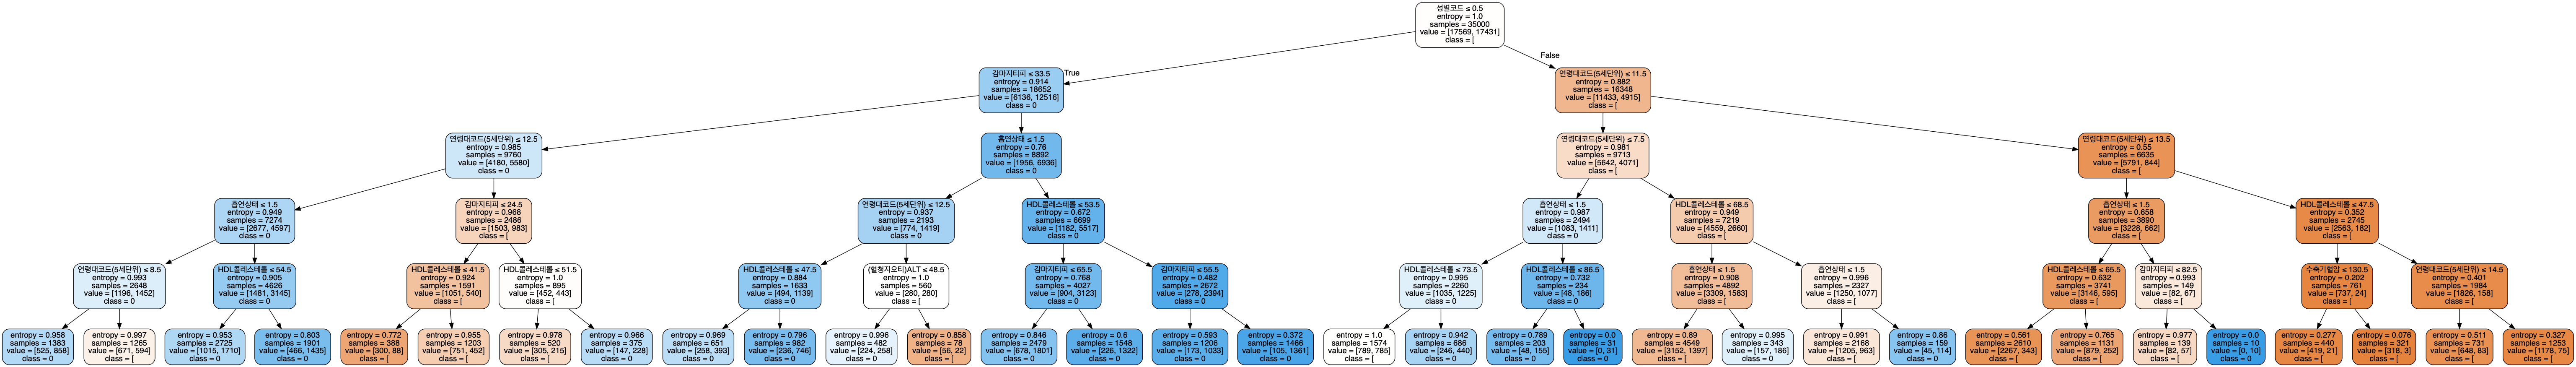

In [76]:
# matplotlib.rc('font', family='AppleGothic')
graph = pydotplus.graph_from_dot_data(dot_data)  # graphviz의 dot data로부터 트리 그래프 생성

# 트리 그래프를 위한 png 이미지 생성 및 출력
Image(graph.create_png())